In [93]:
#Formação Cientista de Dados
#conexão com SQL

In [292]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [261]:
#conexão
conexao = psycopg2.connect(host="localhost",database="Credito", user="postgres", password="123456", port=5432)

In [262]:
#define consulta
consulta = "select * FROM public.\"CREDITO\""
consulta

'select * FROM public."CREDITO"'

In [263]:
#cria um cursor
cursor = conexao.cursor()
#executa
cursor.execute(consulta)

In [264]:
#recupera todos os registros
registros = cursor.fetchall()

In [265]:
#fecha conexão e cursor
cursor.close()
conexao.close()

In [266]:
data = pd.DataFrame(registros)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [267]:
# Column names obtido através de "SELECT column_name FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = N'CREDITO'" no SQL
Column_Name =["IDCREDITO",
                "Duracao",
                "HistoricoCredito",
                "Proposito",
                "Valor",
                "Investimentos",
                "Emprego",
                "TempoParcelamento",
                "EstadoCivil",
                "FiadorTerceiros",
                "ResidenciaDesde",
                "Idade",
                "OutrosFinanciamentos",
                "Habitacao",
                "EmprestimoExistente",
                "Profissao",
                "Dependentes",
                "SocioEmpresa",
                "Estrangeiro",
                "Status"]
Column_Name

['IDCREDITO',
 'Duracao',
 'HistoricoCredito',
 'Proposito',
 'Valor',
 'Investimentos',
 'Emprego',
 'TempoParcelamento',
 'EstadoCivil',
 'FiadorTerceiros',
 'ResidenciaDesde',
 'Idade',
 'OutrosFinanciamentos',
 'Habitacao',
 'EmprestimoExistente',
 'Profissao',
 'Dependentes',
 'SocioEmpresa',
 'Estrangeiro',
 'Status']

In [268]:
data.columns = Column_Name

In [269]:
data.head()

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [270]:
data.shape

(1000, 20)

In [271]:
# Verificar presença de Missings
data.isnull().sum()

IDCREDITO                0
Duracao                  0
HistoricoCredito         0
Proposito                0
Valor                    0
Investimentos            0
Emprego                 10
TempoParcelamento        0
EstadoCivil              0
FiadorTerceiros          0
ResidenciaDesde          7
Idade                    0
OutrosFinanciamentos     0
Habitacao                9
EmprestimoExistente      0
Profissao                0
Dependentes              0
SocioEmpresa             0
Estrangeiro              0
Status                   0
dtype: int64

#### Tratamento 'Emprego'

In [272]:
Emprego = data.groupby(['Emprego']).size()
print(Emprego)

Emprego
1.0    171
2.0    247
3.0    338
4.0    172
5.0     62
dtype: int64


Text(0, 0.5, '% de participação')

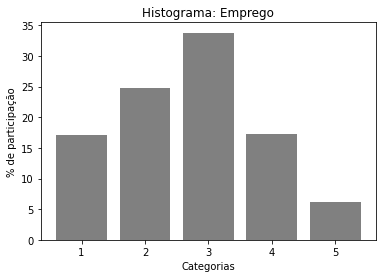

In [273]:
plt.bar(x=[1,2,3,4,5],
        height=(Emprego/len(data))*100,
        color='gray')
plt.xticks([1,2,3,4,5])
plt.title('Histograma: Emprego')
plt.xlabel('Categorias')
plt.ylabel('% de participação')

In [274]:
# TRATAMENTO EMPREGO - Considerar todos missings como pertencentes à categoria 3
data.loc[data['Emprego'].isnull(), 'Emprego'] = 3
Emprego = data.groupby(['Emprego']).size()
print(Emprego)

Emprego
1.0    171
2.0    247
3.0    348
4.0    172
5.0     62
dtype: int64


Text(0, 0.5, '% de participação')

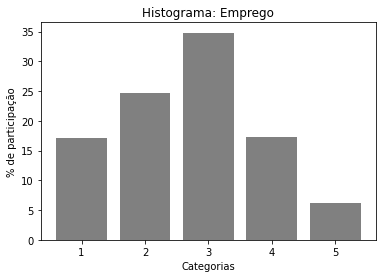

In [275]:
plt.bar(x=[1,2,3,4,5],
        height=(Emprego/len(data))*100,
        color='gray')
plt.xticks([1,2,3,4,5])
plt.title('Histograma: Emprego')
plt.xlabel('Categorias')
plt.ylabel('% de participação')

#### Tratamento 'ResidenciaDesde'

In [276]:
Residencia = data.groupby(['ResidenciaDesde']).size()
print(Residencia)

ResidenciaDesde
1.0    129
2.0    308
3.0    147
4.0    409
dtype: int64


Text(0, 0.5, '% de participação')

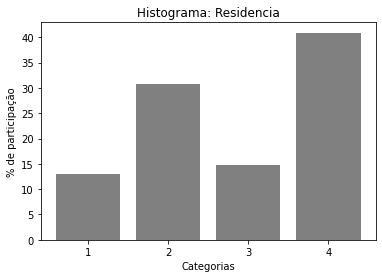

In [277]:
plt.bar(x=[1,2,3,4],
        height=(Residencia/len(data))*100,
        color='gray')
plt.xticks([1,2,3,4])
plt.title('Histograma: Residencia')
plt.xlabel('Categorias')
plt.ylabel('% de participação')

In [280]:
# TRATAMENTO RESIDENCIA - Considerar todos missings como pertencentes à categoria mais numerosa
data.loc[data['ResidenciaDesde'].isnull(), 'ResidenciaDesde'] = 4
Residencia = data.groupby(['ResidenciaDesde']).size()
print(Residencia)

ResidenciaDesde
1.0    129
2.0    308
3.0    147
4.0    416
dtype: int64


Text(0, 0.5, '% de participação')

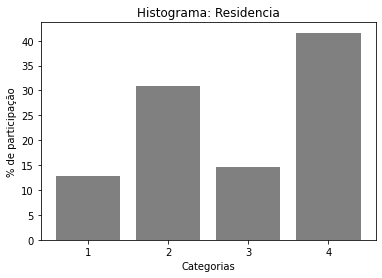

In [281]:
plt.bar(x=[1,2,3,4],
        height=(Residencia/len(data))*100,
        color='gray')
plt.xticks([1,2,3,4])
plt.title('Histograma: Residencia')
plt.xlabel('Categorias')
plt.ylabel('% de participação')

#### Tratamento 'Habitacao'

In [282]:
Habitacao = data.groupby(['Habitacao']).size()
print(Habitacao)

Habitacao
1.0    709
2.0    107
3.0    175
dtype: int64


Text(0, 0.5, '% de participação')

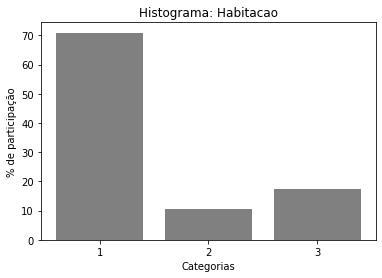

In [284]:
plt.bar(x=[1,2,3],
        height=(Habitacao/len(data))*100,
        color='gray')
plt.xticks([1,2,3])
plt.title('Histograma: Habitacao')
plt.xlabel('Categorias')
plt.ylabel('% de participação')

In [285]:
# TRATAMENTO HABITACAO - Considerar todos missings como pertencentes à categoria mais numerosa
data.loc[data['Habitacao'].isnull(), 'Habitacao'] = 1
Habitacao = data.groupby(['Habitacao']).size()
print(Habitacao)

Habitacao
1.0    718
2.0    107
3.0    175
dtype: int64


Text(0, 0.5, '% de participação')

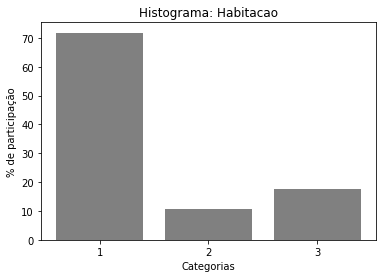

In [286]:
plt.bar(x=[1,2,3],
        height=(Habitacao/len(data))*100,
        color='gray')
plt.xticks([1,2,3])
plt.title('Histograma: Habitacao')
plt.xlabel('Categorias')
plt.ylabel('% de participação')

In [291]:
# Verificar presença de Missings
data.isnull().sum()==0

IDCREDITO               True
Duracao                 True
HistoricoCredito        True
Proposito               True
Valor                   True
Investimentos           True
Emprego                 True
TempoParcelamento       True
EstadoCivil             True
FiadorTerceiros         True
ResidenciaDesde         True
Idade                   True
OutrosFinanciamentos    True
Habitacao               True
EmprestimoExistente     True
Profissao               True
Dependentes             True
SocioEmpresa            True
Estrangeiro             True
Status                  True
dtype: bool

#### Explorar colunas quantitativas (Duracao, Valor, Idade, Dependentes)

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duracao, dtype: float64


C:\Users\jorda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Duracao')

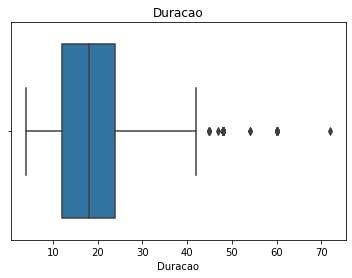

In [294]:
# Duracao

print(data['Duracao'].describe())
sb.boxplot(data['Duracao']).set_title('Duracao')

(array([171., 262., 337.,  57.,  86.,  17.,  54.,   2.,  13.,   1.]),
 array([ 4. , 10.8, 17.6, 24.4, 31.2, 38. , 44.8, 51.6, 58.4, 65.2, 72. ]),
 <BarContainer object of 10 artists>)

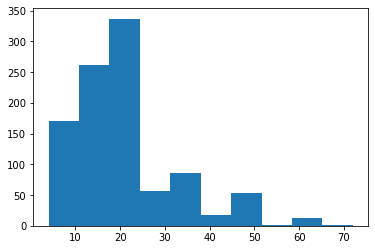

In [295]:
plt.hist(data['Duracao'])

Valor máximo: 72 meses. Parece crível.

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Valor, dtype: float64


C:\Users\jorda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Valor')

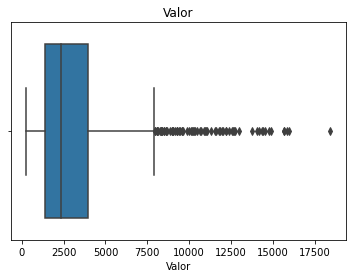

In [297]:
# Valor

print(data['Valor'].describe())
sb.boxplot(data['Valor']).set_title('Valor')

Valor máximo: ~18.000. Parece crível.

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Idade, dtype: float64


C:\Users\jorda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Idade')

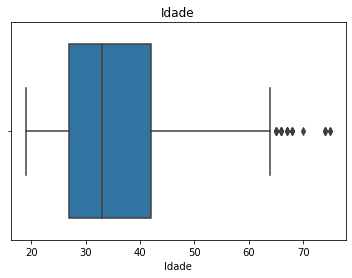

In [299]:
# Idade

print(data['Idade'].describe())
sb.boxplot(data['Idade']).set_title('Idade')

count    1000.000000
mean        1.155000
std         0.362086
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Dependentes, dtype: float64


C:\Users\jorda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Dependentes')

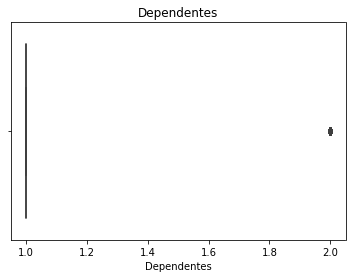

In [300]:
# Dependentes

print(data['Dependentes'].describe())
sb.boxplot(data['Dependentes']).set_title('Dependentes')

### Avaliação
Aparentemente está tudo certo com os dados. \
Os tratamentos necessários foram realizados e as variáveis quantitativas parecem estar corretas.

In [303]:
# Salvar em .csv
data.to_csv('dados/credit.csv', index=False, header=True)